<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #D8CEF6;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Co2 Emissions by Sectors <br>
    (EDA)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Co2 Emissions by Sectors</div>**


## Goal
> ## EDA : Data Distribution, Column Analysis

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('/kaggle/input/co2-emissions-by-sectors/Co2_Emissions_by_Sectors.csv')
df.head()

,Industry_Type,Region,Country,Year,Co2_Emissions_MetricTons,Energy_Consumption_TWh,Automobile_Co2_Emissions_MetricTons,Industrial_Co2_Emissions_MetricTons,Agriculture_Co2_Emissions_MetricTons,Domestic_Co2_Emissions_MetricTons,Population_Millions,GDP_Billion_USD,Urbanization_Percentage,Renewable_Energy_Percentage,Industrial_Growth_Percentage,Transport_Growth_Percentage
0,Construction,North America,Brazil,2010,89.13,90.14,98.37,118.36,31.41,0.77,941.06,13096.32,52.79,7.78,11.17,2.93
1,Mining,Europe,Germany,2006,224.81,931.70,10.81,66.73,39.45,0.21,1421.94,24337.71,50.18,31.52,13.34,9.30
2,Manufacturing,South America,South Africa,2017,179.72,255.14,55.36,111.67,1.25,4.97,522.75,24523.17,65.22,5.91,-9.88,4.77
3,Construction,Europe,India,2018,23.28,887.29,78.99,123.60,46.81,13.77,1304.60,12616.18,23.69,7.52,-0.64,8.21
4,Construction,Africa,China,2013,124.54,923.03,65.93,52.32,35.67,13.91,1437.68,4476.00,94.64,8.54,5.98,0.84


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Industry_Type                         17686 non-null  object 
 1   Region                                17686 non-null  object 
 2   Country                               17686 non-null  object 
 3   Year                                  17686 non-null  int64  
 4   Co2_Emissions_MetricTons              17686 non-null  float64
 5   Energy_Consumption_TWh                17686 non-null  float64
 6   Automobile_Co2_Emissions_MetricTons   17686 non-null  float64
 7   Industrial_Co2_Emissions_MetricTons   17686 non-null  float64
 8   Agriculture_Co2_Emissions_MetricTons  17686 non-null  float64
 9   Domestic_Co2_Emissions_MetricTons     17686 non-null  float64
 10  Population_Millions                   17686 non-null  float64
 11  GDP_Billion_USD

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,17686.0,2011.024935,6.657483,2000.00,2005.0000,2011.000,2017.0000,2022.00
Co2_Emissions_MetricTons,17686.0,150.331667,86.401588,0.50,75.5800,150.820,225.2475,299.99
Energy_Consumption_TWh,17686.0,500.071501,287.008603,0.63,252.4475,499.645,750.0650,999.88
Automobile_Co2_Emissions_MetricTons,17686.0,49.983267,28.936346,0.11,24.7125,50.305,75.2000,100.00
Industrial_Co2_Emissions_MetricTons,17686.0,99.975617,57.630602,0.11,49.5500,100.385,149.8675,200.00
Agriculture_Co2_Emissions_MetricTons,17686.0,24.895109,14.422553,0.10,12.3900,24.820,37.3100,50.00
Domestic_Co2_Emissions_MetricTons,17686.0,10.170034,5.757755,0.10,5.1600,10.200,15.1900,20.00
Population_Millions,17686.0,752.966182,432.819846,0.51,377.4975,750.400,1126.8750,1499.83
GDP_Billion_USD,17686.0,12522.789595,7184.289404,0.22,6392.3675,12491.915,18664.7975,24999.57
Urbanization_Percentage,17686.0,60.039285,23.131004,20.01,39.8025,60.260,80.0300,100.00


In [5]:
df.describe(include = 'object').T

,count,unique,top,freq
Industry_Type,17686,4,Manufacturing,4516
Region,17686,6,Europe,3000
Country,17686,8,Brazil,2342


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [6]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Industry_Type                           0.0
Region                                  0.0
Country                                 0.0
Year                                    0.0
Co2_Emissions_MetricTons                0.0
Energy_Consumption_TWh                  0.0
Automobile_Co2_Emissions_MetricTons     0.0
Industrial_Co2_Emissions_MetricTons     0.0
Agriculture_Co2_Emissions_MetricTons    0.0
Domestic_Co2_Emissions_MetricTons       0.0
Population_Millions                     0.0
GDP_Billion_USD                         0.0
Urbanization_Percentage                 0.0
Renewable_Energy_Percentage             0.0
Industrial_Growth_Percentage            0.0
Transport_Growth_Percentage             0.0
dtype: float64

Duplicate Rows (%):
0.0


In [7]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)

total_rows = len(df)
outlier_count = len(outliers)
outlier_ratio = (outlier_count / total_rows) * 100

if outliers.empty:
    print("No outliers")
else:
    print(f"Number of Outliers: {outlier_count}")
    print(f"Outlier Ratio: {outlier_ratio:.2f}%")

No outliers


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Data Distribution</div>

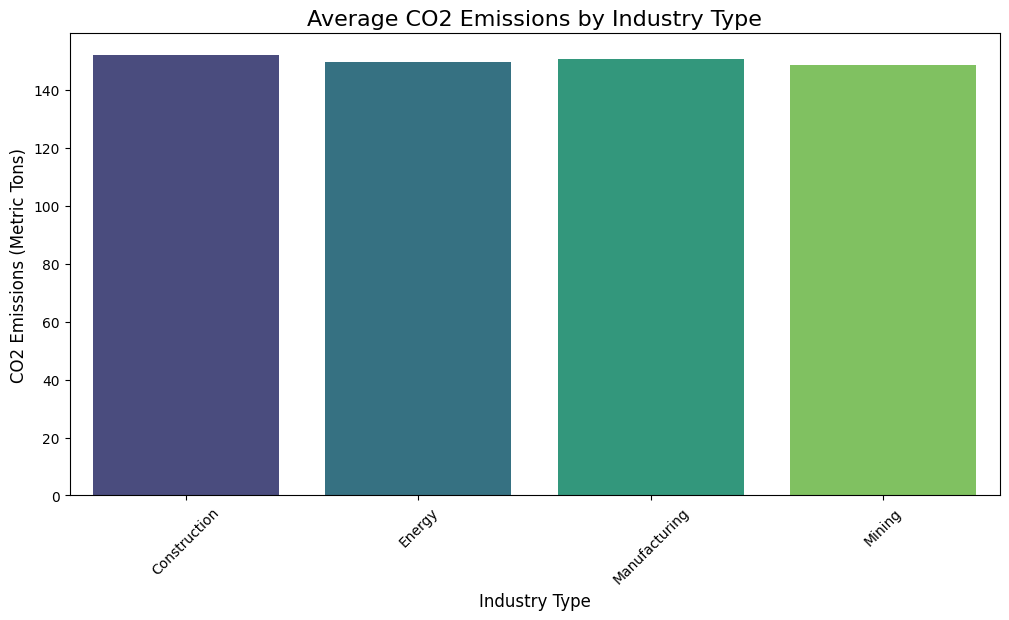

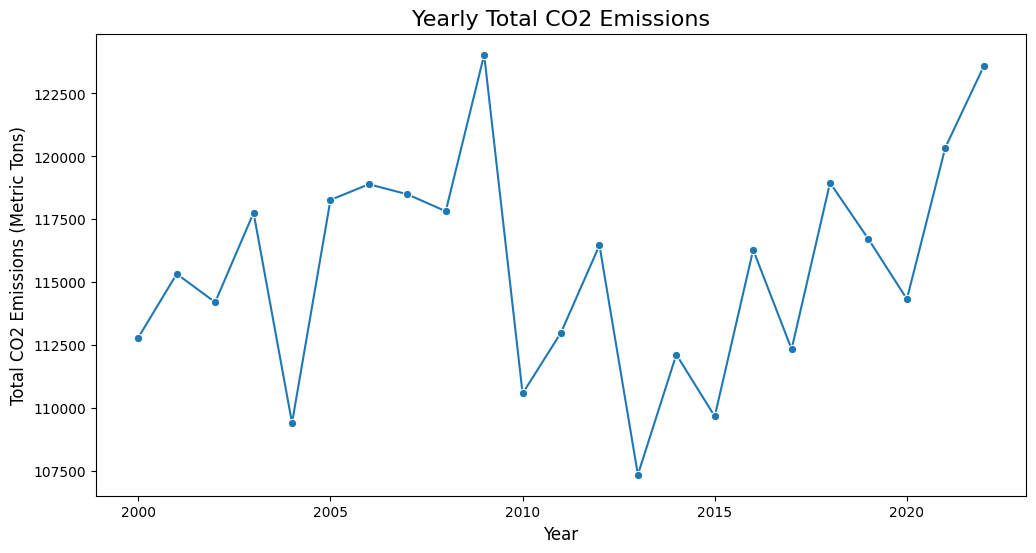

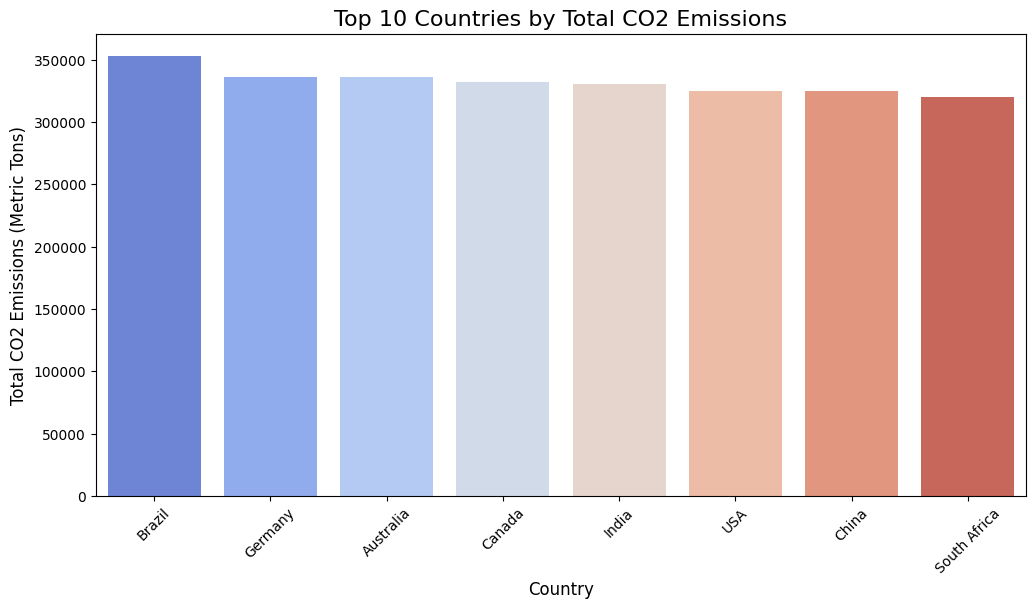

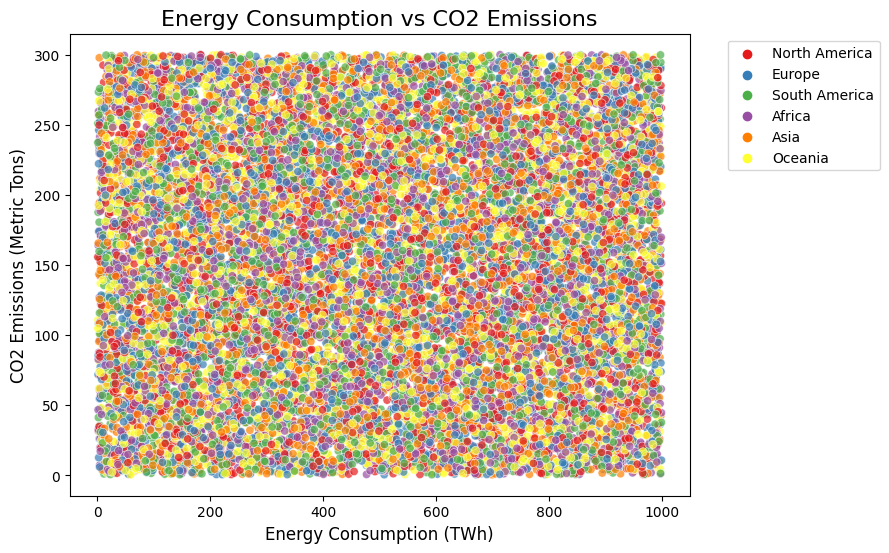

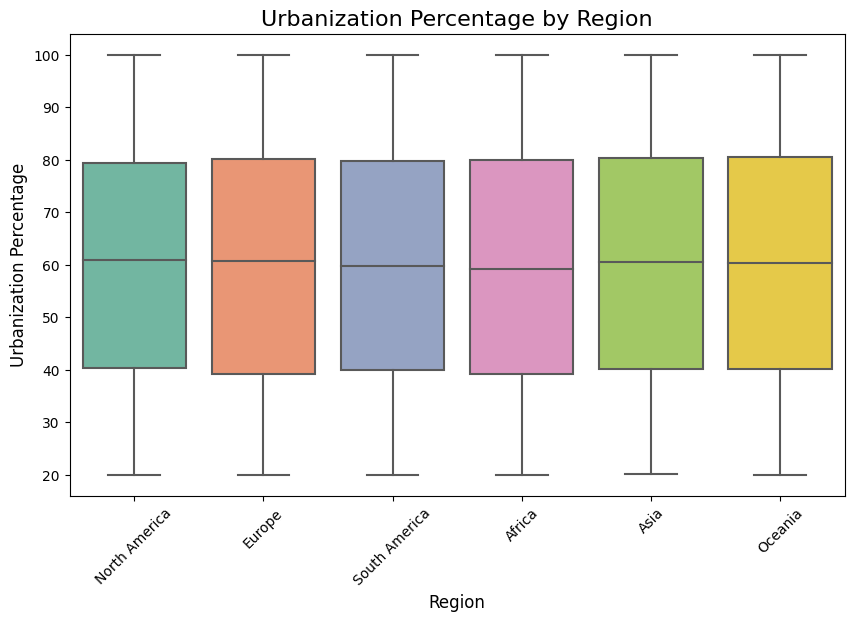

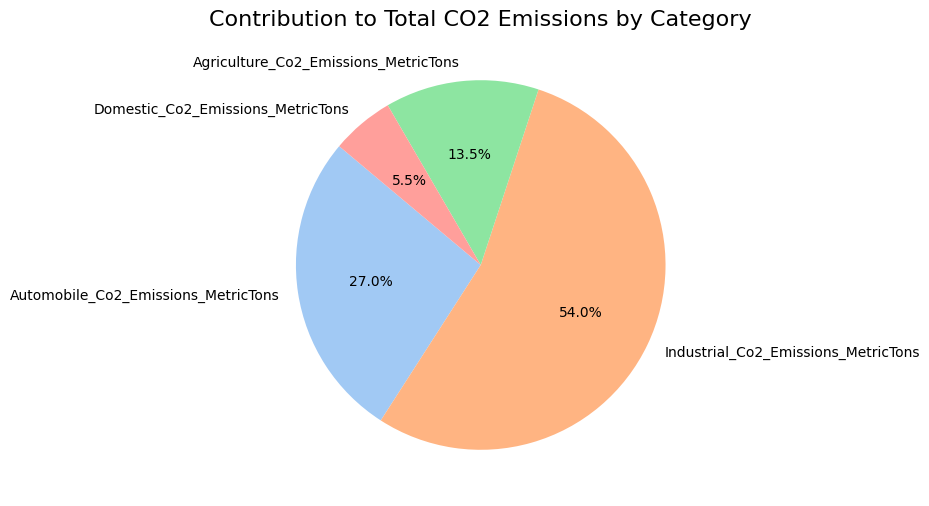

In [8]:
# 1. Average CO2 emissions by industry type
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df.groupby('Industry_Type')['Co2_Emissions_MetricTons'].mean().reset_index(),
    x='Industry_Type', y='Co2_Emissions_MetricTons', palette='viridis'
)
plt.title('Average CO2 Emissions by Industry Type', fontsize=16)
plt.xlabel('Industry Type', fontsize=12)
plt.ylabel('CO2 Emissions (Metric Tons)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

# 2. Yearly CO2 emissions trend
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df.groupby('Year')['Co2_Emissions_MetricTons'].sum().reset_index(),
    x='Year', y='Co2_Emissions_MetricTons', marker='o'
)
plt.title('Yearly Total CO2 Emissions', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total CO2 Emissions (Metric Tons)', fontsize=12)
plt.show()

# 3. Top 10 countries by total CO2 emissions
top_countries = df.groupby('Country')['Co2_Emissions_MetricTons'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')
plt.title('Top 10 Countries by Total CO2 Emissions', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total CO2 Emissions (Metric Tons)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

# 4. Correlation between energy consumption and CO2 emissions
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, x='Energy_Consumption_TWh', y='Co2_Emissions_MetricTons',
    hue='Region', alpha=0.7, palette='Set1'
)
plt.title('Energy Consumption vs CO2 Emissions', fontsize=16)
plt.xlabel('Energy Consumption (TWh)', fontsize=12)
plt.ylabel('CO2 Emissions (Metric Tons)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 5. Urbanization percentage by region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Urbanization_Percentage', palette='Set2')
plt.title('Urbanization Percentage by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Urbanization Percentage', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

# 6. Contribution to total CO2 emissions by category
categories = ['Automobile_Co2_Emissions_MetricTons', 'Industrial_Co2_Emissions_MetricTons',
              'Agriculture_Co2_Emissions_MetricTons', 'Domestic_Co2_Emissions_MetricTons']

category_sums = df[categories].sum()

plt.figure(figsize=(8, 6))
plt.pie(
    category_sums, labels=categories, autopct='%1.1f%%', startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title('Contribution to Total CO2 Emissions by Category', fontsize=16)
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Correlation Analysis</div>

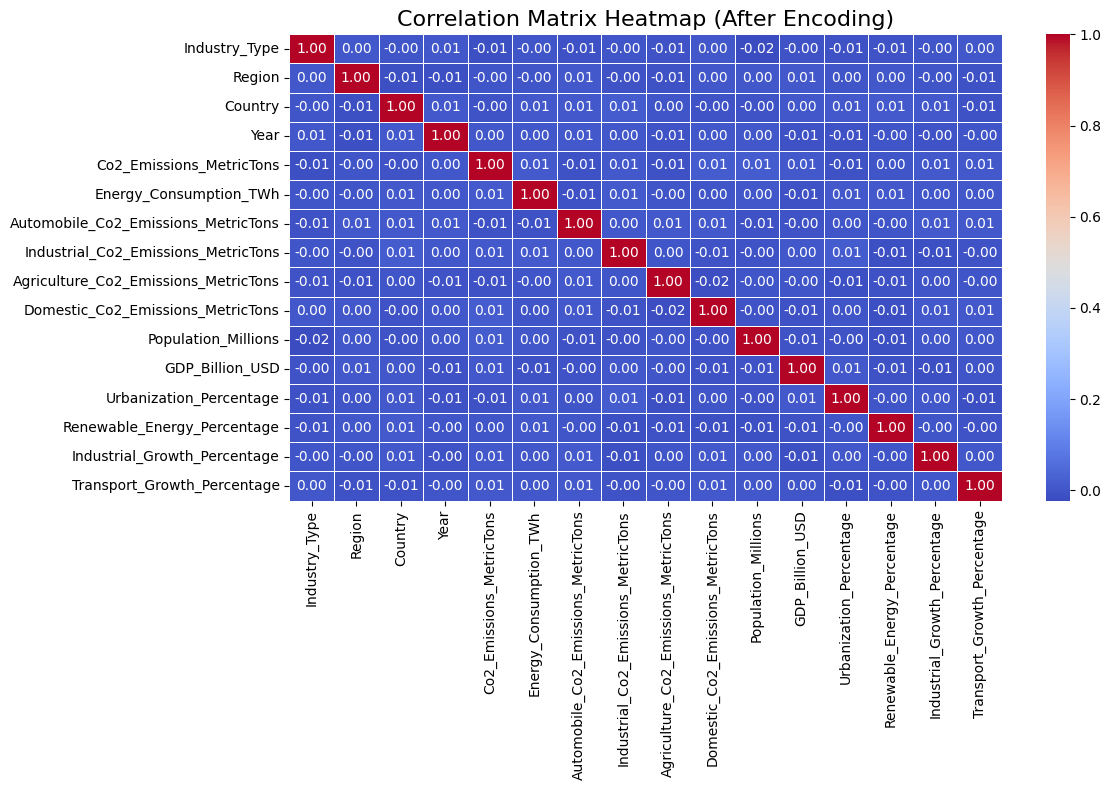

In [9]:
# Create a copy of the DataFrame to encode categorical features
encoded_df = df.copy()

# Apply Label Encoding to object (categorical) columns
label_encoders = {}  # To store encoders for each column
for col in encoded_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col])
    label_encoders[col] = le  # Save encoder for potential inverse transformation

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (After Encoding)', fontsize=16)
plt.tight_layout()
plt.show()

<div style="display: inline-block; padding: 10px 15px; border-radius: 20px; background: linear-gradient(135deg, #ff7f50, #ff1493); box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3); font-size: 30px; font-family: 'Helvetica Neue', Arial, sans-serif; color: #ffffff; text-align: center; border: 2px solid #ffffff;">Thanks !</div><br><br>

<h3> If you have any questions, please feel free to ask me a question and use the code freely ! </h3><br>

<div style="text-align: center;">
    <a href="https://www.kaggle.com/lko9911" target="_blank" style="display: inline-block; background-color: #3a86ff; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px; font-size: 25px;">Kaggle</a>
    <a href="https://github.com/lko9911" target="_blank" style="display: inline-block; background-color: #ff8c00; color: #ffffff; text-decoration: none; padding: 5px 20px; border-radius: 15px; margin: 15px; border: 2px solid #ff4500; font-size: 25px; font-family: 'Arial', sans-serif; font-weight: bold; transition: all 0.3s ease;">GitHub</a></div>